## Summer days

The datafile contains the number of summer days (> 25 C) measured in de Bilt in the Netherlands.


Demonstration: 
    1. Linear Model
    2. Parameter fit, using a poisson likelihood
    3. Standard deviations
    4. Confidence region for the fit

Author: Do Kester


import classes

In [32]:
import numpy as numpy
import math

from astropy.io import ascii
from PolynomialModel import PolynomialModel

from AmoebaFitter import AmoebaFitter
from ScipyFitter import PowellFitter
from PoissonErrorDistribution import PoissonErrorDistribution
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt



Read the data


In [33]:
tbl = ascii.read( "data/zomerdagen.csv" )
year = tbl['col1'].data
nsd = tbl['col2'].data


Define the model

In [56]:
mdl = PolynomialModel( 0 )
print( mdl )


Polynomial: f( x:p ) = p_0 + p_1 * x + p_2 * x^2


define the fitter: Fitter

In [57]:
errdis = PoissonErrorDistribution( year, nsd )
fitter = PowellFitter( year, mdl, errdis="poisson" )
 
# find the parameters
param = fitter.fit( nsd )

  

POWELL
   direc: array([[ 1.000,  0.000,  0.000],
       [ 0.000,  1.000,  0.000],
       [ 0.000,  0.000,  1.000]])
     fun: 507.66018544104031
 message: 'Optimization terminated successfully.'
    nfev: 76
     nit: 1
  status: 0
 success: True
       x: array([ 20.319, -0.000,  0.000])
POWELL True


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/optimize/optimize.py:2207: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/optimize/optimize.py:1876: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [58]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))


Parameters : [   20.319   -0.000    0.000]
StDevs     : [ 2148.373    2.196    0.001]
Scale      :     4.501
Evidence   :  -233.570
Covar matrix :
[[ 4615506.127 -4717.573    1.205]
 [ -4717.573    4.822   -0.001]
 [    1.205   -0.001    0.000]]


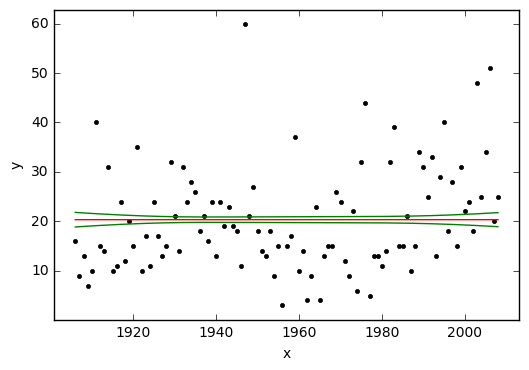

In [59]:
plotFit( year, nsd, mdl, ftr=fitter )


Exercise:
Assert for yourself that higher order polynomials do not fit any better that order 0.



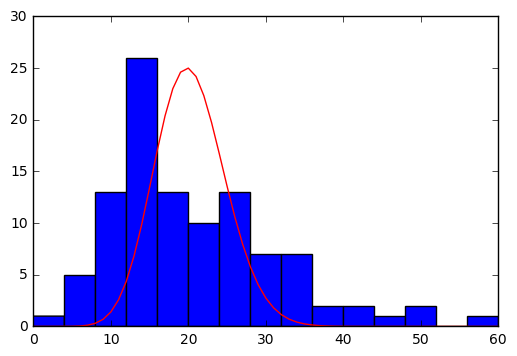

In [55]:
from LogFactorial import logFactorial

x = numpy.linspace( 0, 60, 61, dtype=float )
plt.hist( nsd, 15, (0,60))
p = param[0]
y = numpy.exp( x * math.log( p ) - p - logFactorial( x ) )
y *= 25 / numpy.max( y )
plt.plot( x, y, 'r-' )
plt.show()


The figure above shows a histogram of the measurements, overplot with a poisson distribution with an average of 20.3. It shows that even though we could not find a better model, there is more to the data than a simple poisson draw from a constant average number of summer days.

Duh!?

